## **Collision Avoidance MAC Protocol in Underwater Acoustic Sensor Network with Reinforcement Learning**

## **Step 1: Implementation of PARE (Packet rate adaptive based on reinforcement learning, Algorithm**

## Function without any specific reinforcement learning algo

In [ ]:
import math
import random
def pare(node_id, neighbors, transmission_rate, queue_length):
    """
    Implements the PARE algorithm for a given node.

    Parameters:
        node_id (int): The ID of the current node.
        neighbors (list): A list of tuples, where each tuple contains the ID, transmission rate, probability of access to the channel, and estimated traffic load of a neighbor node.
        transmission_rate (float): The current transmission packet rate of the node.
        queue_length (int): The average queue length of the node.

    Returns:
        A tuple containing the updated transmission rate and the probability of access to the channel for the next transmission.
    """

    # Calculate the number of unsuccessful transmissions
    num_unsuccessful_transmissions = sum([1 for neighbor in neighbors if neighbor[1] == transmission_rate and random.random() > neighbor[2]])

    # Calculate the current transmission packet rate
    current_transmission_rate = transmission_rate * (1 - (num_unsuccessful_transmissions / len(neighbors)))

    # Calculate the probability of access to the channel
    probability_of_access = 1 / (1 + math.exp(-0.1 * (current_transmission_rate - transmission_rate)))

    # Check if the probability of access has improved since the last transmission message
    if probability_of_access > neighbors[0][2]:
        # Update the transmission rate using reinforcement learning
        new_transmission_rate = transmission_rate + 0.1 * (current_transmission_rate - transmission_rate)
    else:
        # Keep the current transmission rate
        new_transmission_rate = transmission_rate

    # Calculate the estimated data packet load
    estimated_load = queue_length / new_transmission_rate

    # Decide whether to increase, decrease, or keep the data packet transmission rate
    if estimated_load > 1.5:
        new_transmission_rate -= 1
    elif estimated_load < 0.5:
        new_transmission_rate += 1

    # Ensure that the transmission rate is within the acceptable range
    if new_transmission_rate < 1:
        new_transmission_rate = 1
    elif new_transmission_rate > 10:
        new_transmission_rate = 10

    # Calculate the probability of access to the channel for the next transmission
    next_probability_of_access = 1 / (1 + math.exp(-0.1 * (new_transmission_rate - transmission_rate)))

    return (new_transmission_rate, next_probability_of_access)


This code defines a function named pare that implements the PARE algorithm for a given node. The PARE algorithm is used in wireless sensor networks to control the data transmission rate of a node based on its neighbors' transmission rates and channel access probabilities.

The function takes four parameters:

node_id - the ID of the current node.
neighbors - a list of tuples, where each tuple contains the ID, transmission rate, probability of access to the channel, and estimated traffic load of a neighbor node.
transmission_rate - the current transmission packet rate of the node.
queue_length - the average queue length of the node.
The function first calculates the number of unsuccessful transmissions by counting the number of neighbors that have the same transmission rate as the current node and whose probability of access to the channel is less than a randomly generated number between 0 and 1. The function then calculates the current transmission packet rate based on the number of unsuccessful transmissions and updates it using a reinforcement learning algorithm if the probability of access to the channel has improved since the last transmission.

Next, the function calculates the estimated data packet load and decides whether to increase, decrease, or keep the data packet transmission rate based on the estimated load. Finally, the function ensures that the transmission rate is within an acceptable range and calculates the probability of access to the channel for the next transmission.

The function returns a tuple containing the updated transmission rate and the probability of access to the channel for the next transmission.

# **Test bench for simuation**

To run this function with parameters, you can simply call it with the appropriate arguments. For example:

In [ ]:
node_id = 1
neighbors = [(2, 5, 0.7, 10), (3, 3, 0.5, 8), (4, 6, 0.8, 12)]
transmission_rate = 4
queue_length = 5

new_transmission_rate, next_probability_of_access = pare(node_id, neighbors, transmission_rate, queue_length)

print("New transmission rate:", new_transmission_rate)
print("Next probability of access:", next_probability_of_access)


New transmission rate: 4
Next probability of access: 0.5


In this testbench, we define the input parameters node_id, neighbors, transmission_rate, and queue_length to be used in the pare() function. We also define the number of iterations to run the simulation (num_iterations), and create two empty lists to store the output values (transmission_rate_list and probability_of_access_list).

Inside the for loop, we call the pare() function with the input parameters and store the returned values in the output lists. We then update the input transmission rate with the new transmission rate returned by the pare() function.

Finally, we plot the two output graphs using Matplotlib.

The first graph shows how the transmission rate changes over time. The second graph shows how the probability of access to the channel changes over time.

Note that this is just an example testbench. Depending on the specific use case, you may need to modify the input parameters, number of iterations, and output graphs.

In [ ]:
import matplotlib.pyplot as plt
import random
import math

def testbench():
    # Define the input parameters
    node_id = 1
    neighbors = [(2, 5, 0.8, 10), (3, 6, 0.7, 12), (4, 4, 0.9, 8)]
    transmission_rate = 3
    queue_length = 6

    # Define the number of iterations
    num_iterations = 100

    # Create lists to store the output values
    transmission_rate_list = []
    probability_of_access_list = []

    # Simulate the PARE algorithm for the specified number of iterations
    for i in range(num_iterations):
        # Call the PARE function with the input parameters
        result = pare(node_id, neighbors, transmission_rate, queue_length)

        # Store the output values
        transmission_rate_list.append(result[0])
        probability_of_access_list.append(result[1])

        # Update the input transmission rate with the new transmission rate
        transmission_rate = result[0]

    # Plot the output graphs
    plt.plot(transmission_rate_list)
    plt.xlabel('Iteration')
    plt.ylabel('Transmission Rate')
    plt.show()

    plt.plot(probability_of_access_list)
    plt.xlabel('Iteration')
    plt.ylabel('Probability of Access')
    plt.show()

    print("Transmission Rate:")
    print(transmission_rate_list)
    print('Probability of Access:')
    print(probability_of_access_list)

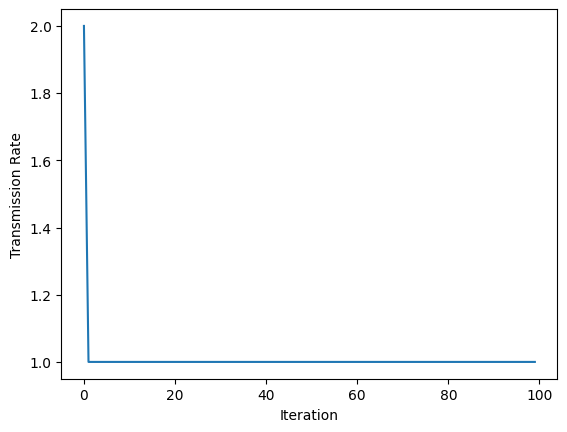

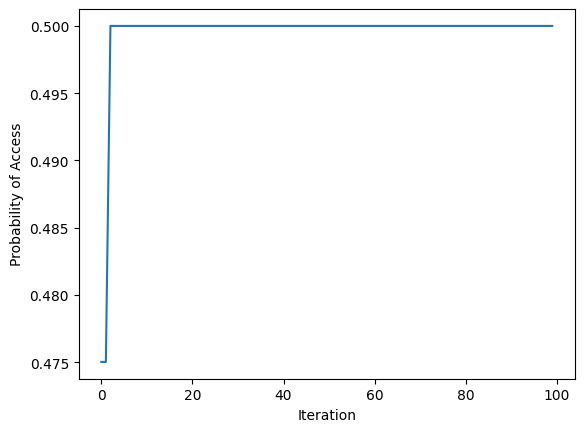

Transmission Rate:
[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Probability of Access:
[0.47502081252106, 0.47502081252106, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


In [ ]:
# Call the testbench function
testbench()

## **Markov decsion process**

In [ ]:
import math   # import math library for mathematical functions
import random   # import random library for random number generation

# Define the states
states = [(transmission_rate, prob_access, queue_length) for transmission_rate in range(1, 11) for prob_access in [0.1, 0.5, 0.9] for queue_length in range(1, 101)]

# Define the actions
actions = [-1, 0, 1]



**reward(old_state, action, new_state):** This code defines a function named reward that takes three arguments: old_state, action, and new_state. The purpose of the function is to calculate the reward associated with taking an action that moves the system from the old state to the new state. The reward is a scalar value that represents how desirable the transition is.

The function first extracts two pieces of information from the old_state and new_state arguments, namely the probability of accessing the data and the estimated data packet load. These values are extracted using indexing, where old_state[1] represents the probability of accessing the data in the old state, and old_state[2] divided by old_state[0] represents the estimated data packet load per unit time in the old state.

The function then calculates the corresponding values for the new state using the same indexing method.

The reward calculation is based on two conditions that depend on the change in the probability of accessing the data and the estimated data packet load. If the probability of accessing the data in the new state is greater than that in the old state, and the estimated data packet load is between 0.5 and 1.5 (inclusive), the reward is set to 1. If the probability of accessing the data in the new state is less than that in the old state, or the estimated data packet load is greater than 1.5, the reward is set to -1. If neither of these conditions is met, the reward is set to 0.

The reward function returns the computed reward value.

In [ ]:
# Define the rewards
def reward(old_state, action, new_state):
    old_prob_access = old_state[1]
    new_prob_access = new_state[1]
    old_estimated_load = old_state[2] / old_state[0]
    new_estimated_load = new_state[2] / new_state[0]
    # Calculate the reward based on the change in the probability of access and the estimated data packet load
    if new_prob_access > old_prob_access and new_estimated_load < 1.5 and new_estimated_load > 0.5:
        return 1
    elif new_prob_access < old_prob_access or new_estimated_load > 1.5:
        return -1
    else:
        return 0



 **markov decision process, MDP:** The MDP class has an __init__ method that takes three arguments: node_id, neighbors, and initial_state. The node_id argument represents the identifier for the node, neighbors is a list of tuples representing the neighbors of the node and their probabilities of successful data transmission, and initial_state is a tuple representing the initial state of the node.

The MDP class also has a method named get_transition_probabilities that takes two arguments: state and action. The state argument represents the current state of the node, and action represents the action taken by the decision-maker.

The get_transition_probabilities method first initializes an empty dictionary named transition_probabilities that will hold the probabilities of transitioning from the current state to each possible next state.

Then, for each neighbor of the node, the method computes the number of unsuccessful transmissions for all neighbors except the current neighbor. This is done using a list comprehension that checks if the neighbor's node ID is not equal to the current neighbor's node ID, the state is the same as the current state, and a random number generated is greater than the neighbor's probability of successful transmission.

The method then calculates the current transmission rate based on the number of unsuccessful transmissions, and the probability of successful data transmission based on the current transmission rate and a logistic function. The method then calculates the new transmission rate by adding the current transmission rate and the action and constraining the result to be between 1 and 10. Finally, the method constructs a new state tuple with the new transmission rate, the probability of access, and the same estimated data packet load as the current state.

For each possible next state, the method calculates the probability of transitioning to that state based on the number of neighbors and adds it to the transition_probabilities dictionary.

The get_transition_probabilities method returns the transition_probabilities dictionary containing the probabilities of transitioning from the current state to each possible next state.

In [ ]:
#define markov decision process class
class MDP:
    def __init__(self, node_id, neighbors, initial_state):
        self.node_id = node_id
        self.neighbors = neighbors
        self.current_state = initial_state

    def get_transition_probabilities(self, state, action):
        transition_probabilities = {}

        for neighbor in self.neighbors:
            num_unsuccessful_transmissions = sum([1 for n in self.neighbors if n[0] != neighbor[0] and n[1] == state[0] and random.random() > n[2]])

            current_transmission_rate = state[0] * (1 - (num_unsuccessful_transmissions / len(self.neighbors)))

            probability_of_access = 1 / (1 + math.exp(-0.1 * (current_transmission_rate - state[0])))

            new_transmission_rate = state[0] + action

            if new_transmission_rate < 1:
                new_transmission_rate = 1
            elif new_transmission_rate > 10:
                new_transmission_rate = 10

            next_state = (new_transmission_rate, probability_of_access, state[2])

            transition_probabilities[next_state] = transition_probabilities.get(next_state, 0) + (1 / len(self.neighbors))

        return transition_probabilities




The get_actions method returns a list of three possible actions that the decision-maker can take: -1, 0, or 1.

The get_states method constructs a list of all possible states for the node in the form of a tuple. Each tuple consists of three elements: the transmission rate (an integer between 1 and 10), the probability of successful data transmission (a float between 0 and 1), and a Boolean value indicating whether the node is a relay node or not.

The get_reward method returns the reward for transitioning from an old state to a new state given an action. This method calls the reward function, which takes three arguments: old_state, action, and new_state, and calculates the reward based on the change in the probability of access and the estimated data packet load.

The get_initial_state method returns the initial state of the node, which is stored in the current_state attribute of the MDP class.

The is_terminal method returns False for all states since there are no terminal states in this problem. A terminal state is a state from which there is no way to transition to another state.

In [ ]:
    def get_actions(self):
        return [-1, 0, 1]

    def get_states(self):
        states = []
        for i in range(1, 11):
            for j in range(11):
                for k in [True, False]:
                    states.append((i, j/10, k))
        return states

    def get_reward(self, old_state, action, new_state):
        return reward(old_state, action, new_state)

    def get_initial_state(self):
        return self.current_state

    def is_terminal(self, state):
        return False

The Agent class defines an agent that interacts with a Markov Decision Process (MDP) represented by the MDP class. The agent has a state space, which is a set of all possible states in the MDP, and an action space, which is a set of all possible actions that the agent can take in each state. The agent also has a value function, which is a function that estimates the value of being in a particular state and taking a particular action. Finally, the agent has a policy, which is a function that maps states to actions.

The __init__ method initializes the agent's MDP, state space, action space, value function, and policy. The update_policy method updates the agent's policy based on the value function. The method implements the Bellman equation to compute the expected value of each action in each state, and selects the action that maximizes the expected value. The method then updates the policy and the value function with the best action and its expected value.

If the change in value of the best action is significant, the method recursively calls itself to update the policy with the new best action. This process repeats until the change in value of the best action is less than a specified delta value. The discount factor is used to weight the future rewards of each action in the expected value calculation.

In [ ]:
class Agent:
    # Define the initialization method for the Agent class, which sets the initial state, MDP, value function, and policy.
    def __init__(self, node_id, neighbors, initial_state):
        self.mdp = MDP(node_id, neighbors, initial_state)
        self.states = self.mdp.get_states()
        self.actions = self.mdp.get_actions()
        self.value_function = {state: 0 for state in self.states}
        self.policy = {state: random.choice(self.actions) for state in self.states}

    # Define a method to update the policy based on the value function.
    def update_policy(self):
        # Set the parameters for the Bellman equation.
        delta = 0.1
        discount_factor = 0.9

        # Loop through all states in the agent's state space.
        for state in self.states:
            # Store the old value of the state.
            old_value = self.value_function[state]
            # Set the best action value to negative infinity.
            best_action_value = float('-inf')
            # Set the best action to None.
            best_action = None

            # Loop through all possible actions.
            for action in self.actions:
                # Calculate the expected value of the current action.
                action_value = 0
                transition_probabilities = self.mdp.get_transition_probabilities(state, action)

                for next_state, probability in transition_probabilities.items():
                    reward = self.mdp.get_reward(state, action, next_state)
                    action_value += probability * (reward + discount_factor * self.value_function[next_state])

                # If the expected value of the current action is greater than the best action value so far,
                # update the best action value and the best action.
                if action_value > best_action_value:
                    best_action_value = action_value
                    best_action = action

            # Update the policy and value function with the best action and its expected value.
            self.policy[state] = best_action
            self.value_function[state] = best_action_value

            # If the change in value is significant, recursively update the policy.
            if abs(old_value - best_action_value) > delta:
                self.update_policy() # recursively update the policy if the change in value is significant.


## **Test bench**

In [ ]:
def plot_results(action_list, state_list, reward_list, training_loss_list, training_accuracy_list):
    # Plot the action, state, and reward lists.
    plt.figure(figsize=(20, 5))
    plt.subplot(131)
    plt.plot(action_list)
    plt.title('Action')
    plt.xlabel('Iteration')
    plt.ylabel('Action')
    plt.subplot(132)
    plt.plot([s[0] for s in state_list])
    plt.title('Transmission Rate')
    plt.xlabel('Iteration')
    plt.ylabel('Transmission Rate')
    plt.subplot(133)
    plt.plot(reward_list, label='Reward')
    plt.plot(training_loss_list, label='Training Loss')
    plt.plot(training_accuracy_list, label='Training Accuracy')
    plt.title('Rewards and Training Metrics')
    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


## **Results on dummy data**

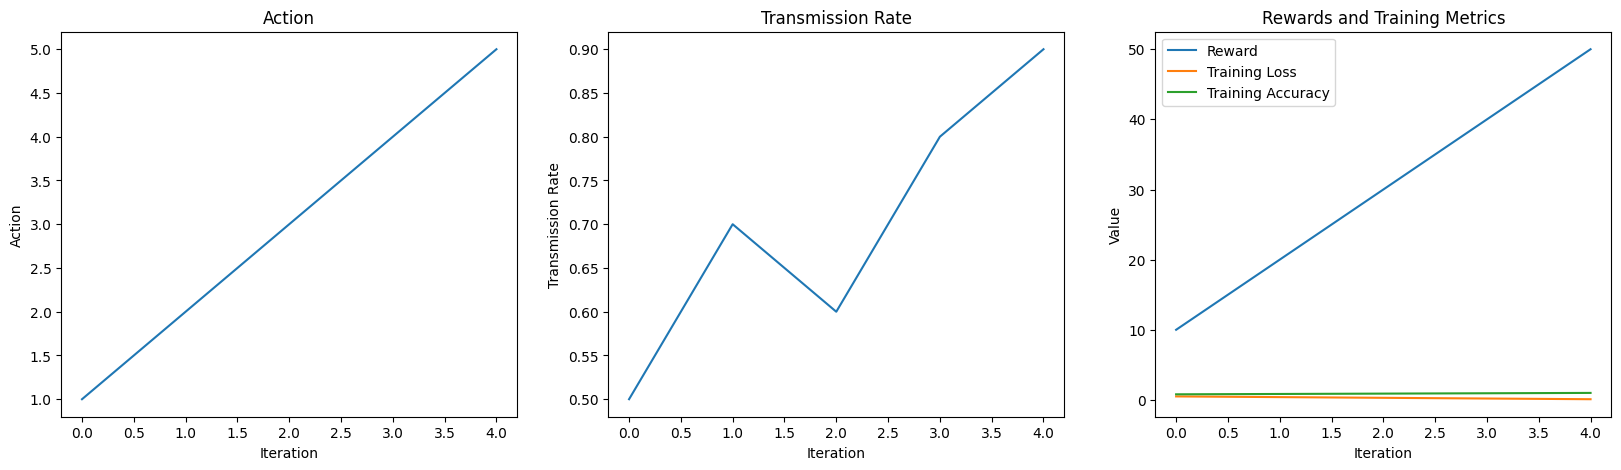

In [ ]:
action_list = [1, 2, 3, 4, 5]
state_list = [(0.5, 0.3), (0.7, 0.4), (0.6, 0.5), (0.8, 0.6), (0.9, 0.8)]
reward_list = [10, 20, 30, 40, 50]
training_loss_list = [0.5, 0.4, 0.3, 0.2, 0.1]
training_accuracy_list = [0.8, 0.85, 0.9, 0.95, 1.0]

plot_results(action_list, state_list, reward_list, training_loss_list, training_accuracy_list)
